In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Library for Project

In [ ]:
!pip uninstall -y keras
!pip uninstall -y tensorflow
!pip install tensorflow>=2.7.0
!pip install keras
!pip install imgviz
!pip install labelme

Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 48.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

# Down and Unzip Labelme

In [ ]:
!git clone https://github.com/wkentaro/labelme

Cloning into 'labelme'...
remote: Enumerating objects: 7903, done.
remote: Counting objects: 100% (318/318), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 7903 (delta 192), reused 231 (delta 141), pack-reused 7585
Receiving objects: 100% (7903/7903), 45.22 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (4762/4762), done.


# Write Classify Scripts

In [ ]:
# Create variable for pipline
PATH_foldername = "Lane_03" # Identify folder in ggdrive and change it the same "PATH_foldername"
PATH_folderrar = f"{PATH_foldername}.rar"
PATH_results = f"{PATH_foldername}_results"
PATH_nameClassJPG = "JPEGImages"
PATH_nameClassPNG = "SegmentationClassPNG"
# PATH of convert file
PATH_2segmentation = "/content/Segmentation"
PATH_folderClassPNG = f"{PATH_2segmentation}/{PATH_foldername}/{PATH_results}/{PATH_nameClassPNG}"
PATH_folderClassJPG = f"{PATH_2segmentation}/{PATH_foldername}/{PATH_results}/{PATH_nameClassJPG}"
PATH_train = f"/content/train"

src_labelme = "/content/labelme/examples/semantic_segmentation"

# PATH save a model train
PATH_weights = f"/content/drive/MyDrive/Dataset/Segmentation/{PATH_foldername}/weights"
PATH_csv = f"/content/drive/MyDrive/Dataset/Segmentation/{PATH_foldername}/training_{PATH_foldername}.csv"
#PATH of pretrained model
number_pretrained = "045" # Change to adjust pre-trained
PATH_foldrPre = "Lane_02/weights"
PATH_pretrained = f"/content/drive/MyDrive/Dataset/Segmentation/{PATH_foldrPre}/model-{number_pretrained}.h5"

In [ ]:
# Down by ggdrive --id for data
%mkdir {PATH_2segmentation}
%cd {PATH_2segmentation}
!gdown --id 10-vfY5RZlEd7OxTx-qmFZLFkWKMmVlMC # Lane_03
!gdown --id 14kYisBdqIMRgL20rDl6eghI2PvarCW3a # Lane_02
!unrar x {PATH_foldername}

/content/Segmentation
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10-vfY5RZlEd7OxTx-qmFZLFkWKMmVlMC
To: /content/Segmentation/Lane_03.rar
100% 211M/211M [00:02<00:00, 94.2MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14kYisBdqIMRgL20rDl6eghI2PvarCW3a
To: /content/Segmentation/Lane_02.rar
100% 470M/470M [00:05<00:00, 91.4MB/s]

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from Lane_03.rar

Creating    Lane_03                                                   OK
Creating    Lane_03/img                   

In [ ]:
# %cd {src_segmentation}/{PATH_foldername}
%cd {PATH_2segmentation}/{PATH_foldername}
!rm labels.txt # nếu có file thì xóa
!echo '__ignore__' >> labels.txt
!echo '_background_' >> labels.txt
!echo 'lane' >> labels.txt

/content/Segmentation/Lane_03
rm: cannot remove 'labels.txt': No such file or directory


In [ ]:
# # Execute and backup to ggdrive
# %cd {src_labelme}
# !rm -rf {src_segmentation}/{PATH_foldername}/{PATH_results}
# !python labelme2voc.py {src_segmentation}/{PATH_foldername}/label {src_segmentation}/{PATH_foldername}/{PATH_results} --labels {src_segmentation}/{PATH_foldername}/labels.txt

# Execute and do not backup to ggdrive /content/Lane_03/label
%cd {src_labelme}
!rm -rf /content/{PATH_foldername}/{PATH_results}
!python labelme2voc.py {PATH_2segmentation}/{PATH_foldername}/label {PATH_2segmentation}/{PATH_foldername}/{PATH_results} --labels {PATH_2segmentation}/{PATH_foldername}/labels.txt


/content/labelme/examples/semantic_segmentation
Creating dataset: /content/Segmentation/Lane_03/Lane_03_results
class_names: ('_background_', 'lane')
Saved class_names: /content/Segmentation/Lane_03/Lane_03_results/class_names.txt
Generating dataset from: /content/Segmentation/Lane_03/label/lane_19700.json
Generating dataset from: /content/Segmentation/Lane_03/label/lane_19500.json
Generating dataset from: /content/Segmentation/Lane_03/label/lane_17210.json
Generating dataset from: /content/Segmentation/Lane_03/label/lane_3910.json
Generating dataset from: /content/Segmentation/Lane_03/label/lane_8260.json
Generating dataset from: /content/Segmentation/Lane_03/label/lane_1410.json
Generating dataset from: /content/Segmentation/Lane_03/label/lane_11310.json
Generating dataset from: /content/Segmentation/Lane_03/label/lane_6680.json
Generating dataset from: /content/Segmentation/Lane_03/label/lane_13910.json
Generating dataset from: /content/Segmentation/Lane_03/label/lane_17450.json
Gen

# Filter Data to train

In [ ]:
#Get data from drive
%rm -rf {PATH_train}
%mkdir {PATH_train}
# Create a right file to train
!cp -av {PATH_folderClassPNG} {PATH_train}
!cp -av {PATH_folderClassJPG} {PATH_train}
# Check folder to move
%cd {PATH_train}
!ls

'/content/Segmentation/Lane_03/Lane_03_results/SegmentationClassPNG' -> '/content/train/SegmentationClassPNG'
'/content/Segmentation/Lane_03/Lane_03_results/SegmentationClassPNG/lane_17420.png' -> '/content/train/SegmentationClassPNG/lane_17420.png'
'/content/Segmentation/Lane_03/Lane_03_results/SegmentationClassPNG/lane_18810.png' -> '/content/train/SegmentationClassPNG/lane_18810.png'
'/content/Segmentation/Lane_03/Lane_03_results/SegmentationClassPNG/lane_16130.png' -> '/content/train/SegmentationClassPNG/lane_16130.png'
'/content/Segmentation/Lane_03/Lane_03_results/SegmentationClassPNG/lane_1630.png' -> '/content/train/SegmentationClassPNG/lane_1630.png'
'/content/Segmentation/Lane_03/Lane_03_results/SegmentationClassPNG/lane_13830.png' -> '/content/train/SegmentationClassPNG/lane_13830.png'
'/content/Segmentation/Lane_03/Lane_03_results/SegmentationClassPNG/lane_7810.png' -> '/content/train/SegmentationClassPNG/lane_7810.png'
'/content/Segmentation/Lane_03/Lane_03_results/Segment

In [ ]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input
from keras.models import Model, load_model
from keras.layers import concatenate
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
from keras.callbacks import CSVLogger

import pandas as pd
import os
import cv2
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.compat.v1.disable_eager_execution()

def create_model(input_shape, pool_size):
    # Create the actual neural network here
    input_img = Input(input_shape, name='img')

    c1_1 = Conv2D(8, (3, 3), activation='relu', padding='same') (input_img)
    c1_2 = Conv2D(8, (3, 3), activation='relu', padding='same') (input_img)
    c1 = concatenate([c1_1, c1_2])
    p1 = MaxPooling2D((2, 2)) (c1)

    c2_1 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
    c2_2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
    c2 = concatenate([c2_1, c2_2])
    p2 = MaxPooling2D((2, 2)) (c2)

    c3_1 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
    c3_2 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
    c3 = concatenate([c3_1, c3_2])
    p3 = MaxPooling2D((2, 2)) (c3)

    u5 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (p3)
    u5 = concatenate([u5, c3])
    c6 = Conv2D(32, (3, 3), activation='relu', padding='same') (u5)
    c6 = Conv2D(32, (3, 3), activation='relu', padding='same') (c6)

    u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c2])
    c7 = Conv2D(16, (3, 3), activation='relu', padding='same') (u7)
    c7 = Conv2D(16, (3, 3), activation='relu', padding='same') (c7)

    u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c1])
    c8 = Conv2D(8, (3, 3), activation='relu', padding='same') (u8)
    c8 = Conv2D(8, (3, 3), activation='relu', padding='same') (c8)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c8)

    model = Model(inputs=[input_img], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
    model.summary()
    return model

In [ ]:
%cd {PATH_train}
# %cd /content/drive/MyDrive/Dataset/Segmentation/Lane_03/Lane_results_03

/content/train


In [ ]:
filenames = sorted(glob("JPEGImages/*"))
labelf= sorted(glob("SegmentationClassPNG/*"))

filenames.sort()
labelf.sort()
labels=[]
images=[]

def augment_hsv(im, hgain= 0, sgain=0.5, vgain=0.5):
    # HSV color-space augmentation
    if hgain or sgain or vgain:
        r = np.random.uniform(-1, 1, 3) * [hgain, sgain, vgain] + 1  # random gains
        hue, sat, val = cv2.split(cv2.cvtColor(im, cv2.COLOR_RGB2HSV))
        dtype = im.dtype  # uint8

        x = np.arange(0, 256, dtype=r.dtype)
        lut_hue = ((x * r[0]) % 180).astype(dtype)
        lut_sat = np.clip(x * r[1], 0, 255).astype(dtype)
        lut_val = np.clip(x * r[2], 0, 255).astype(dtype)

        im_hsv = cv2.merge((cv2.LUT(hue, lut_hue), cv2.LUT(sat, lut_sat), cv2.LUT(val, lut_val)))
        cv2.cvtColor(im_hsv, cv2.COLOR_HSV2RGB, dst=im)  # no return needed


#đọc tất cả ảnh
for path in filenames:
    img = cv2.imread(path, 1)
    # augment_hsv(img) if np.random.randint(2) == 1 else 0
    # img = img[200:, :, :]
    img = img[200:, :]
    img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
    img = img/255
    # img = np.expand_dims(img, 2)
    images.append(img)
#đọc tất cả label
for path in labelf:
    mask = plt.imread(path)
    if len(mask.shape) == 3:
      mask = mask[200:, :, 0]
      mask = np.where(mask != 0, 1.0, 0.0)
    else:
      mask = mask[200:, :]

    mask= cv2.resize(mask, (mask.shape[1]//4, mask.shape[0]//4))
    # print(mask.shape)
    mask=mask.reshape(mask.shape[0], mask.shape[1] ,1)
    labels.append(mask)

print(np.array(labels).shape)
print(np.array(images).shape)


(2093, 40, 160, 1)
(2093, 40, 160, 3)


(2093, 40, 160, 1)
(2093, 40, 160, 3)


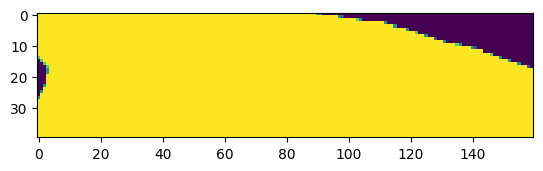

In [ ]:
import numpy as np
print(np.array(labels).shape)
print(np.array(images).shape)
# plt.imshow(np.array(images[0]).reshape(40,160,3))
plt.imshow(np.array(labels[0]).reshape(40,160))

In [ ]:
images = np.array(images)
labels = np.array(labels)
images, labels = shuffle(images, labels)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2)

batch_size = 128    #batch size
epochs = 100     #số epochs
pool_size = (2, 2)
input_shape = X_train.shape[1:]
print(input_shape)
model = create_model(input_shape, pool_size)                #Xây dựng model

earlystop = EarlyStopping(patience=10)
# datagen = ImageDataGenerator(channel_shift_range=0.2, brightness_range=[0.7,1.3])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',   #điều cần quan tâm là độ chính xác nếu độ chính xác
                                                                 #không tăng thì lr sẽ giảm
                                            patience=3,          #số lượng epoch mà sau đó không cải thiện chương trình sẽ stop
                                            verbose=1,           #có cập nhật và hiển thị trạng thái khi reduce
                                            factor=0.5,          #new_lr=factor*lr
                                            min_lr=1e-6)      #giới hạn lr
checkpoint = ModelCheckpoint(f'{PATH_weights}'+'/model-{epoch:03d}.h5',
                                 monitor='val_loss',
                                 verbose=1,
                                 save_best_only=True,
                                 mode='auto')

csv_logger = CSVLogger(PATH_csv, separator=',', append=False)

callb=[learning_rate_reduction,checkpoint,csv_logger]

# # #Load Pretrain
# !rm -rf {PATH_weights}
# !rm -rf {PATH_csv}
# pretrained = load_model(PATH_pretrained)
# history = pretrained.fit(X_train, y_train ,  validation_data=(X_val, y_val),
#                     epochs=epochs, verbose=1, callbacks=callb)

#bắt đầu training
# model = load_model('/content/pretrain/model-046.h5')
!rm -rf {PATH_weights}
!rm -rf {PATH_csv}

history = model.fit(X_train, y_train ,  validation_data=(X_val, y_val),
                    epochs=epochs, verbose=1, callbacks=callb)

(40, 160, 3)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 40, 160, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 40, 160, 8)   224         ['img[0][0]']                    
                                                                                                  
 conv2d_1 (Conv2D)              (None, 40, 160, 8)   224         ['img[0][0]']                    
                                                                                                  
 concatenate (Concatenate)      (None, 40, 160, 16)  0           ['conv2d[0][0]',

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_loss improved from inf to 0.33266, saving model to /content/drive/MyDrive/Dataset/Segmentation/Lane_03/weights/model-001.h5
1674/1674 [==============================] - 12s 7ms/sample - loss: 0.5310 - accuracy: 0.7188 - val_loss: 0.3327 - val_accuracy: 0.8673 - lr: 0.0010
Epoch 2/100
1664/1674 [============================>.] - ETA: 0s - loss: 0.2672 - accuracy: 0.8998
Epoch 2: val_loss improved from 0.33266 to 0.21032, saving model to /content/drive/MyDrive/Dataset/Segmentation/Lane_03/weights/model-002.h5
1674/1674 [==============================] - 1s 782us/sample - loss: 0.2665 - accuracy: 0.9001 - val_loss: 0.2103 - val_accuracy: 0.9194 - lr: 0.0010
Epoch 3/100
1632/1674 [============================>.] - ETA: 0s - loss: 0.1916 - accuracy: 0.9300
Epoch 3: val_loss improved from 0.21032 to 0.14684, saving model to /content/drive/MyDrive/Dataset/Segmentation/Lane_03/weights/model-003.h5
1674/1674 [==============================] - 1s 800us/sample - loss: 0.1908 - accur

# Export Data from CSV file

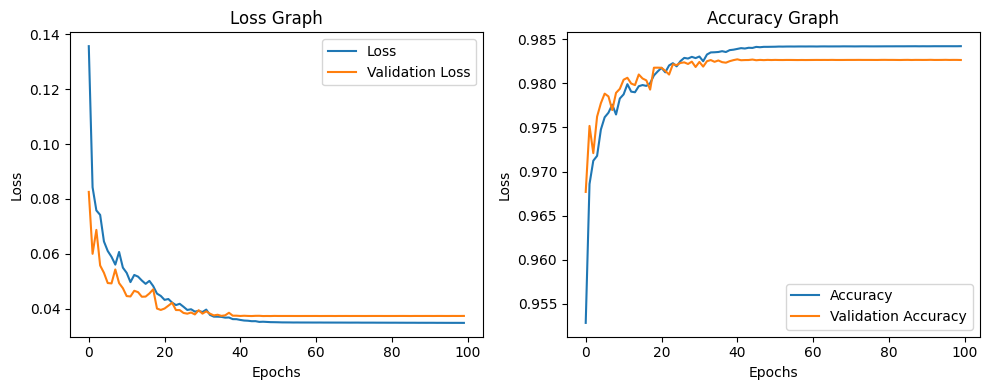

In [ ]:
DATA = pd.read_csv(PATH_csv)

epochs = DATA['epoch'].tolist()
train_loss = DATA['loss'].tolist()
val_loss = DATA['val_loss'].tolist()
train_acc = DATA['accuracy'].tolist()
val_acc = DATA['val_accuracy'].tolist()

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))
# Loss graph
axis1.plot(epochs[0:100], train_loss[0:100], label='Loss')
axis1.plot(epochs[0:100], val_loss[0:100], label='Validation Loss')
axis1.set_title('Loss Graph')
axis1.set_xlabel('Epochs')
axis1.set_ylabel('Loss')
axis1.legend()
# Accuracy graph
axis2.plot(epochs[0:100], train_acc[0:100], label='Accuracy')
axis2.plot(epochs[0:100], val_acc[0:100], label='Validation Accuracy')
axis2.set_title('Accuracy Graph')
axis2.set_xlabel('Epochs')
axis2.set_ylabel('Loss')
axis2.legend()

plt.tight_layout()
plt.show()

In [ ]:
img_test = '/content/train/JPEGImages/lane_9080.jpg'
number_model = '047'
PATH_model_test = f'{PATH_weights}/model-{number_model}.h5'
X_test = cv2.imread(img_test)
from PIL import Image
from google.colab.patches import cv2_imshow
import os
import cv2
from keras.models import load_model

modeltrain = load_model(PATH_model_test)

X_test = X_test[200:, :, :]
X_test = cv2.resize(X_test, (X_test.shape[1]//4, X_test.shape[0]//4))
X_test = np.array(X_test)
X_test = X_test/255
X_test = X_test[None,:,:,:]
predictions = modeltrain.predict(X_test)
print(predictions.shape)

(1, 40, 160, 1)


In [ ]:
modeltrain = load_model(PATH_model_test)
img = cv2.imread(img_test)

print(img.shape)
img = img[200:, :, :]
# img = np.expand_dims(img, 2)

img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
# cv2.imwrite("pre_img.png", img)

img = img/255
img = np.array(img, dtype=np.float32)
print(img.shape)
img = img[None, :, :,:]
pred = modeltrain.predict(img)
pred = np.squeeze(pred)
pred = np.where(pred > 0.5, 255, 0)
pred = pred.astype(np.uint8)
print(pred)
print(np.unique(pred))


(360, 640, 3)
(40, 160, 3)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[  0 255]


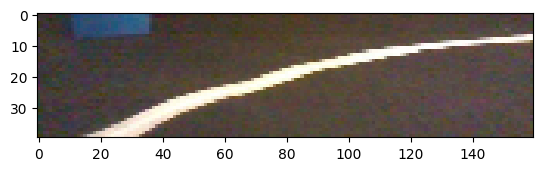

In [ ]:
# img = cv2.imread('/content/Lane_results/JPEGImages/lane_22000.jpg')
plt.imshow(np.array(img).reshape(40,160,3))

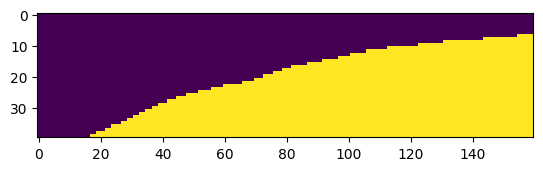

In [ ]:
plt.imshow(np.array(pred).reshape(40,160))
